In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [4]:
#导入数据
train_df=pd.read_csv('../Data/train.csv')
test_df=pd.read_csv('../Data/test.csv')
#看是否有缺失值
train_df.isnull().sum()
test_df.isnull().sum()

row_id       0
time         0
x            0
y            0
direction    0
dtype: int64

In [5]:
#检查每个特征的值
print(train_df['x'].unique())
print(train_df['y'].unique())
print(train_df['direction'].unique())

[0 1 2]
[0 1 2 3]
['EB' 'NB' 'SB' 'WB' 'NE' 'SW' 'NW' 'SE']


In [6]:
def feature_engineering(data):
    data['time']=pd.to_datetime(data['time'])
    data['month']=data['time'].dt.month
    data['weekday']=data['time'].dt.weekday
    data['hour']=data['time'].dt.hour
    data['minute']=data['time'].dt.minute
    data['is_month_start']=data['time'].dt.is_month_start.astype('int')
    data['is_month_end'] = data['time'].dt.is_month_end.astype('int')
    data['period'] = data['hour'] // 4
    data['period'].replace({0: 'Late Night', 1: 'Early Morning', 2: 'Morning', 3: 'Noon', 4: 'Evening', 5: 'Night'},
                           inplace=True)
    data['is_weekend']=(data['weekday']>4).astype('int')
    data['is_Monday']=np.where((data['weekday'] == 0), 1, 0)
    data['is_Friday']=np.where((data['weekday'] == 4), 1, 0)
    data['road']= data['x'].astype(str) + data['y'].astype(str) + data['direction']
    return data

In [7]:
train_df=feature_engineering(train_df)

In [7]:
train_df.head()

,row_id,time,x,y,direction,congestion,month,weekday,hour,minute,is_month_start,is_month_end,period,is_weekend,is_Monday,is_Friday,road
0,0,1991-04-01,0,0,EB,70,4,0,0,0,1,0,Late Night,0,1,0,00EB
1,1,1991-04-01,0,0,NB,49,4,0,0,0,1,0,Late Night,0,1,0,00NB
2,2,1991-04-01,0,0,SB,24,4,0,0,0,1,0,Late Night,0,1,0,00SB
3,3,1991-04-01,0,1,EB,18,4,0,0,0,1,0,Late Night,0,1,0,01EB
4,4,1991-04-01,0,1,NB,60,4,0,0,0,1,0,Late Night,0,1,0,01NB


<AxesSubplot:xlabel='congestion', ylabel='Count'>

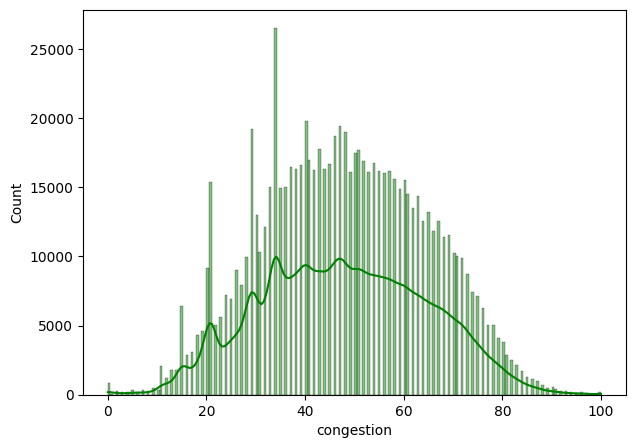

In [8]:
plt.figure(figsize=(7,5))
sns.histplot(train_df['congestion'],color="green",kde=True)

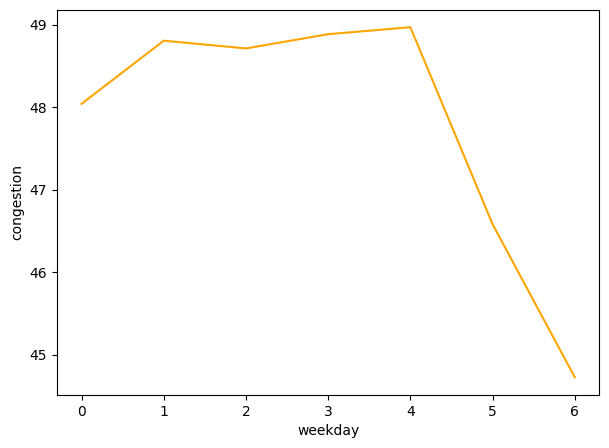

In [20]:
plt.figure(figsize=(7,5))
sns.lineplot(data=train_df,x='weekday',y='congestion',color="orange",err_style=None)
plt.savefig('figure/weekday.eps')

Text(0, 0.5, 'congestion')

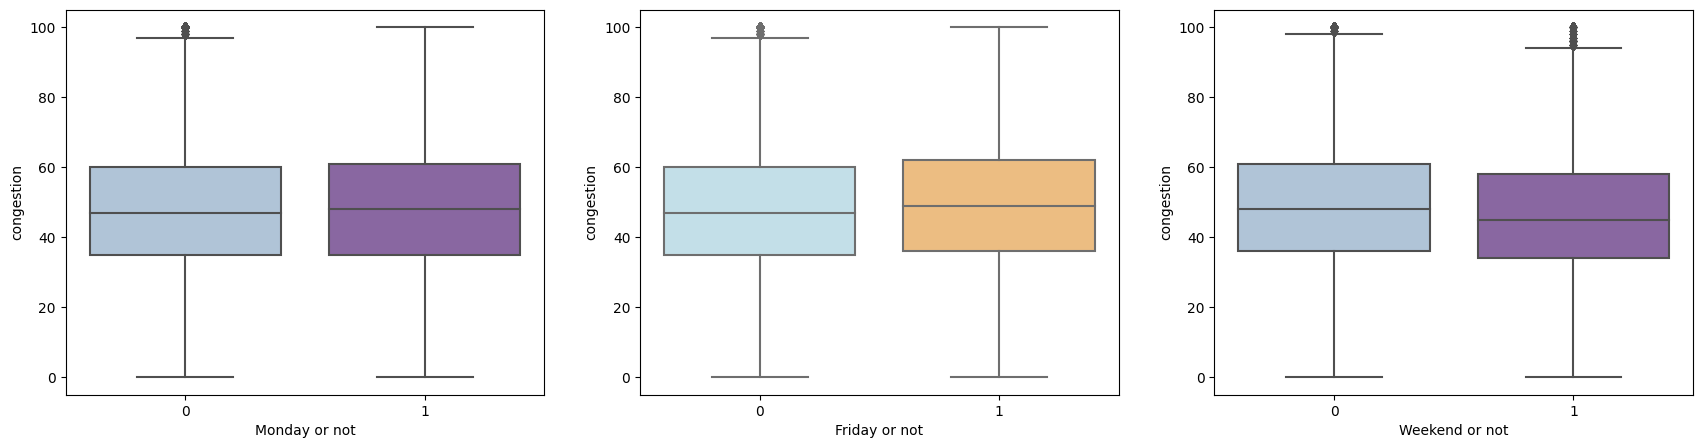

In [10]:
fig,ax=plt.subplots(nrows=1, ncols=3,figsize=(21,5))
sns.boxplot(data=train_df, x='is_Monday', y='congestion',ax=ax[0],palette='BuPu')
ax[0].set_xlabel("Monday or not")
ax[0].set_ylabel("congestion")
sns.boxplot(data=train_df, x='is_Friday', y='congestion', ax=ax[1],palette='RdYlBu_r')
ax[1].set_xlabel("Friday or not")
ax[1].set_ylabel("congestion")
sns.boxplot(data=train_df, x='is_weekend', y='congestion',ax=ax[2],palette='BuPu')
ax[2].set_xlabel("Weekend or not")
ax[2].set_ylabel("congestion")

In [ ]:
roads=train_df['road'].unique()
plt.subplots(figsize=(12,80))
for i,road in enumerate(roads):
    plt.subplot(30,3,i+1)
    plt.title(roads[i])
    sns.barplot(x=train_df['hour'][train_df['road']==road],y=train_df['congestion'])
    plt.tight_layout()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


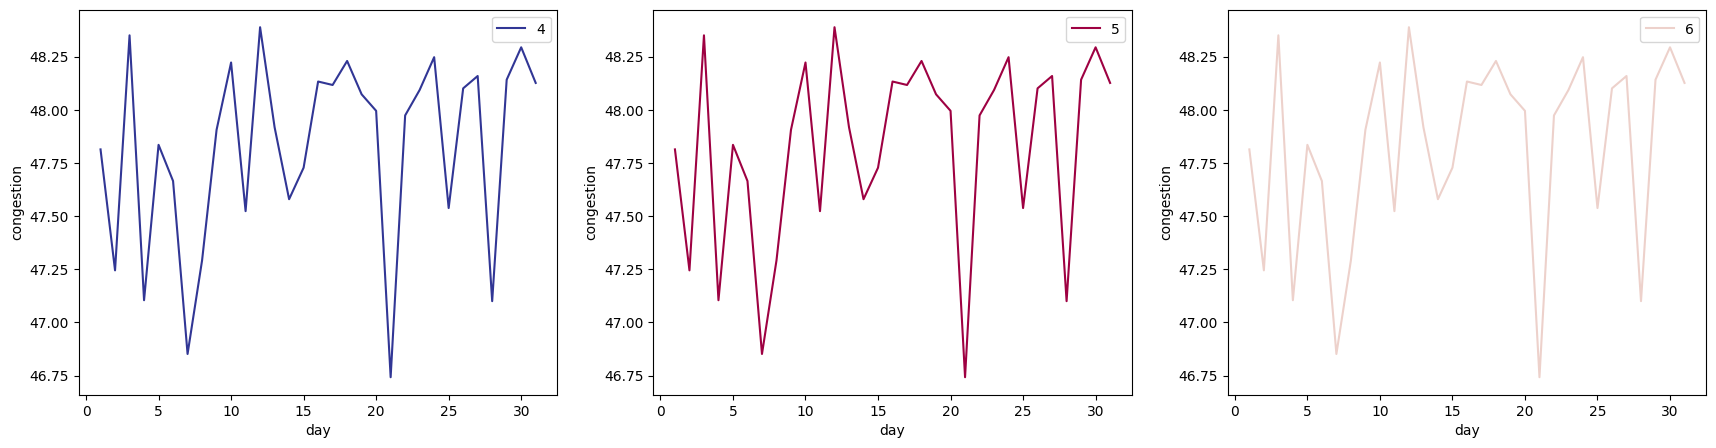

In [23]:
months=train_df['month'].unique()
fig,ax=plt.subplots(nrows=1, ncols=3,figsize=(21,5))
sns.lineplot(x=train_df['time'].dt.day,y=train_df['congestion'],hue=months[0],palette='RdYlBu_r',ax=ax[0],err_style=None)
ax[0].set_xlabel("day")
sns.lineplot(x=train_df['time'].dt.day,y=train_df['congestion'],hue=months[1],palette='Spectral',ax=ax[1],err_style=None)
ax[1].set_xlabel("day")
sns.lineplot(x=train_df['time'].dt.day,y=train_df['congestion'],hue=months[2],ax=ax[2],err_style=None)
ax[2].set_xlabel("day")
plt.savefig('figure/day.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


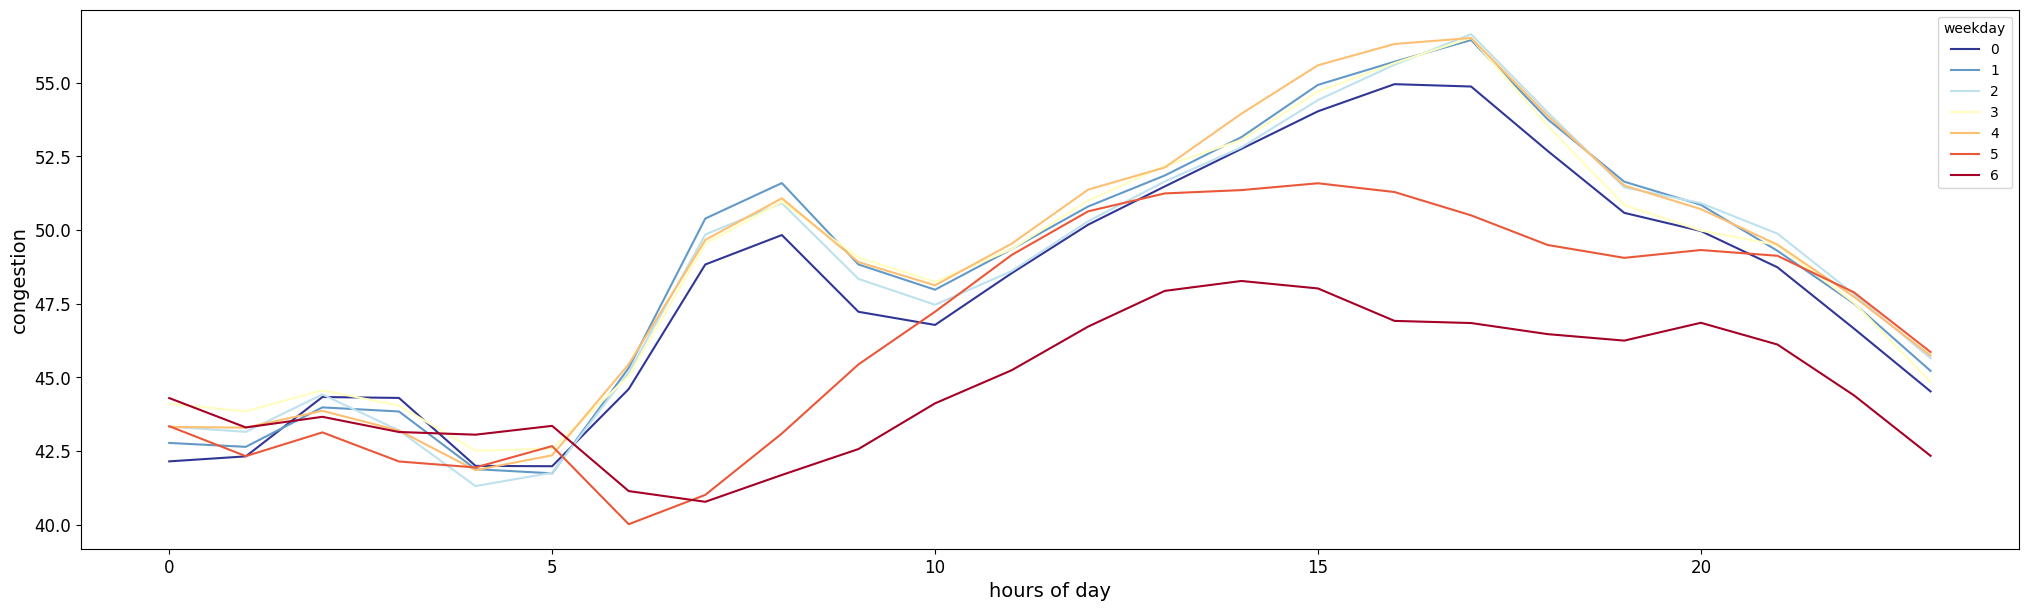

In [22]:
plt.subplots(figsize=(25, 7))
sns.lineplot(data=train_df, x=train_df['hour'], y='congestion',hue=train_df['weekday'], palette='RdYlBu_r',err_style=None)
plt.xlabel(xlabel='hours of day', fontsize=14)
plt.ylabel(ylabel='congestion', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('figure/hour.eps')

<AxesSubplot:xlabel='road', ylabel='congestion'>

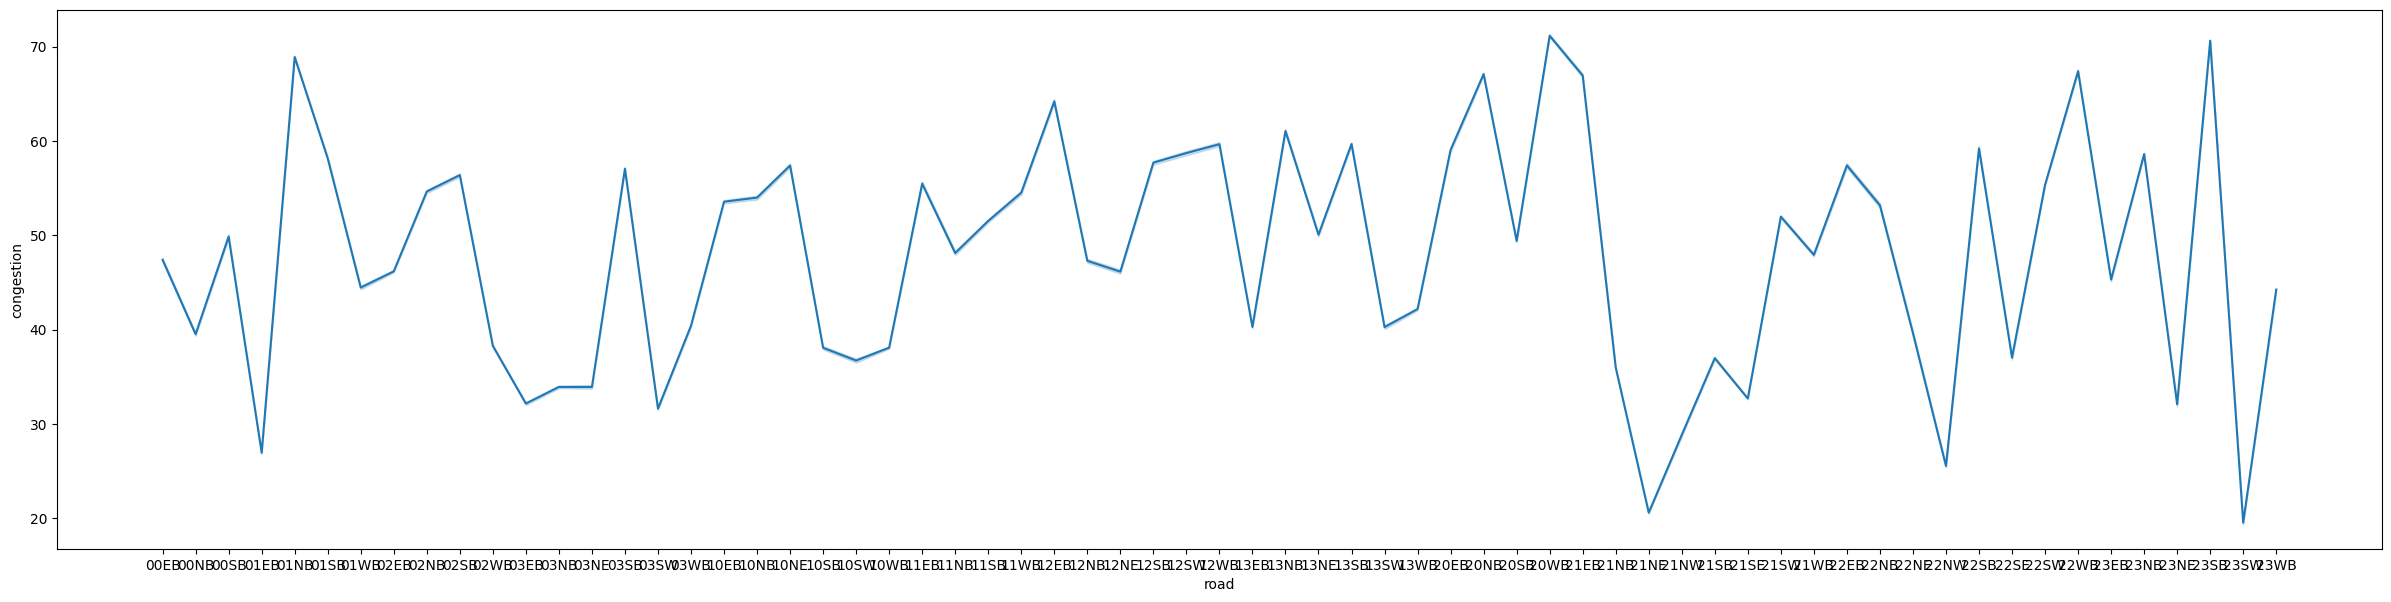

In [12]:
plt.subplots(figsize=(30, 7))
sns.lineplot(data=train_df, x='road', y='congestion')

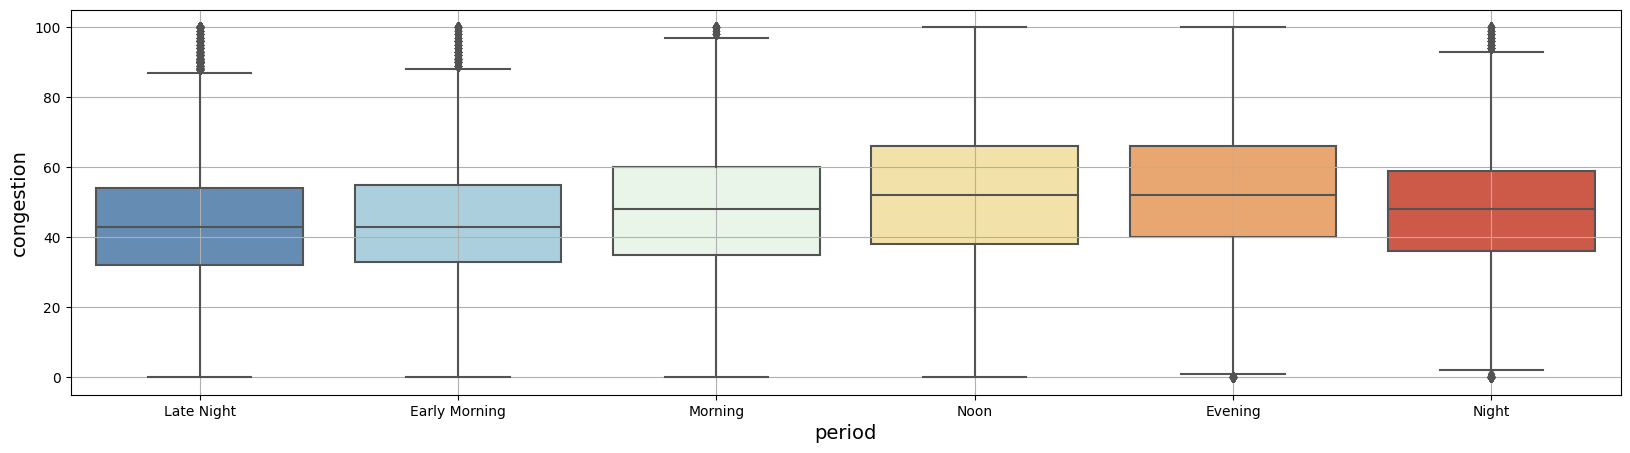

In [13]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=train_df, x='period', y='congestion', palette='RdYlBu_r')
plt.xlabel(xlabel='period', fontsize=14)
plt.ylabel(ylabel='congestion', fontsize=14)
plt.grid(visible=True)

In [155]:
train = train_df.drop(['row_id', 'direction','congestion', 'x', 'y','time'],axis=1)
train.head()


,month,weekday,hour,minute,is_month_start,is_month_end,period,is_weekend,is_Monday,is_Friday,road
0,4,0,0,0,1,0,Late Night,0,1,0,00EB
1,4,0,0,0,1,0,Late Night,0,1,0,00NB
2,4,0,0,0,1,0,Late Night,0,1,0,00SB
3,4,0,0,0,1,0,Late Night,0,1,0,01EB
4,4,0,0,0,1,0,Late Night,0,1,0,01NB


In [157]:
test_df=feature_engineering(test_df)
test = test_df.drop(['row_id', 'direction', 'x', 'y','time'],axis=1)
test.head()

,month,weekday,hour,minute,is_month_start,is_month_end,period,is_weekend,is_Monday,is_Friday,road
0,9,0,12,0,0,1,Noon,0,1,0,00EB
1,9,0,12,0,0,1,Noon,0,1,0,00NB
2,9,0,12,0,0,1,Noon,0,1,0,00SB
3,9,0,12,0,0,1,Noon,0,1,0,01EB
4,9,0,12,0,0,1,Noon,0,1,0,01NB


In [158]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import sklearn

In [159]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
train['period']=lbl.fit_transform(train['period'].astype(str)) 
train['road']=lbl.fit_transform(train['road'].astype(str)) 

In [160]:
x_train, x_eval, y_train, y_eval= train_test_split(train, train_df['congestion'], test_size=0.25,random_state=0)


In [187]:
lgb_train = lgb.Dataset(x_train, y_train)

In [197]:
params = {
    'objective' : 'regression',
    'metric': 'mae',
    'learning_rate': 0.25,
    'num_iteration': 200,
    'num_leaves':250,
    'device':'gpu'
}

In [198]:
model = lgb.train(params,lgb_train)
y_pred = model.predict(x_eval)




d:\software\anaconda\envs\pydet\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 636626, number of used features: 11
[LightGBM] [Warning] Setting max_bin to 63 is suggested for best performance
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 7 dense feature groups (4.86 MB) transferred to GPU in 0.005512 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 47.806500


<Figure size 1200x600 with 0 Axes>

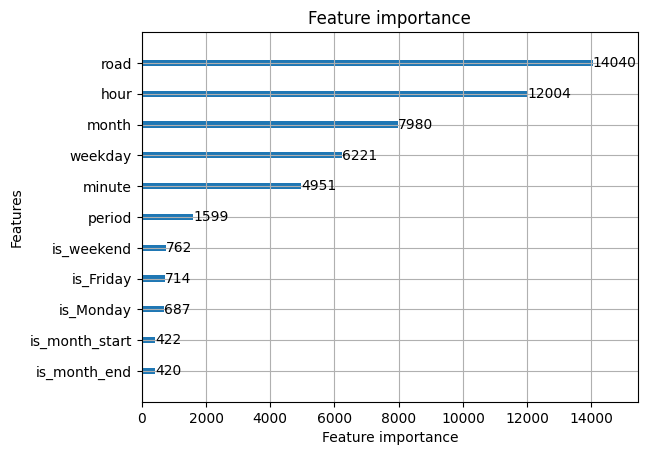

In [201]:
plt.figure(figsize=(12,6))
lgb.plot_importance(model)
plt.savefig('figure/feature_importance.eps')

In [202]:
print('R2：',sklearn.metrics.explained_variance_score(y_eval,y_pred))
print('可解释方差值：',sklearn.metrics.r2_score(y_eval,y_pred))
print('平均绝对误差：',sklearn.metrics.mean_absolute_error(y_eval,y_pred))

R2： 0.7277251135484366
可解释方差值： 0.7277243544483329
平均绝对误差： 6.167491947603395


In [203]:
test['period']=lbl.fit_transform(test['period'].astype(str)) 
test['road']=lbl.fit_transform(test['road'].astype(str)) 

In [209]:
pred = model.predict(test)
for x in range(len(test_df)):
    print(test_df.row_id[x],int(pred[x]))

848835 47
848836 33
848837 39
848838 54
848839 64
848840 23
848841 28
848842 70
848843 25
848844 47
848845 46
848846 25
848847 69
848848 60
848849 43
848850 47
848851 61
848852 64
848853 36
848854 30
848855 35
848856 60
848857 29
848858 40
848859 57
848860 54
848861 59
848862 38
848863 39
848864 37
848865 54
848866 54
848867 52
848868 67
848869 53
848870 49
848871 62
848872 62
848873 63
848874 43
848875 54
848876 63
848877 38
848878 41
848879 63
848880 68
848881 47
848882 72
848883 70
848884 33
848885 28
848886 33
848887 30
848888 45
848889 51
848890 63
848891 58
848892 42
848893 25
848894 62
848895 55
848896 73
848897 47
848898 57
848899 30
848900 45
848901 32
848902 38
848903 54
848904 66
848905 23
848906 29
848907 71
848908 24
848909 44
848910 43
848911 26
848912 69
848913 58
848914 43
848915 47
848916 60
848917 62
848918 36
848919 31
848920 34
848921 60
848922 28
848923 40
848924 56
848925 54
848926 59
848927 42
848928 40
848929 38
848930 56
848931 55
848932 54
848933 67
848934 55


In [211]:
sub = pd.DataFrame(list(zip(test_df['row_id'].values,pred.astype('int'))),columns = ['row_id', 'congestion'])
sub.to_csv('../Data/submission.csv')